# Website A/B Testing - Lab

## Introduction

In this lab, you'll get another chance to practice your skills at conducting a full A/B test analysis. It will also be a chance to practice your data exploration and processing skills! The scenario you'll be investigating is data collected from the homepage of a music app page for audacity.

## Objectives

You will be able to:
* Analyze the data from a website A/B test to draw relevant conclusions
* Explore and analyze web action data

## Exploratory Analysis

Start by loading in the dataset stored in the file 'homepage_actions.csv'. Then conduct an exploratory analysis to get familiar with the data.

> Hints:
    * Start investigating the id column:
        * How many viewers also clicked?
        * Are there any anomalies with the data; did anyone click who didn't view?
        * Is there any overlap between the control and experiment groups? 
            * If so, how do you plan to account for this in your experimental design?

In [45]:
#Your code here
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('homepage_actions.csv')

df

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view
...,...,...,...,...
8183,2017-01-18 09:11:41.984113,192060,experiment,view
8184,2017-01-18 09:42:12.844575,755912,experiment,view
8185,2017-01-18 10:01:09.026482,458115,experiment,view
8186,2017-01-18 10:08:51.588469,505451,control,view


In [46]:
df.describe(), df.info(), df.action.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8188 entries, 0 to 8187
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  8188 non-null   object
 1   id         8188 non-null   int64 
 2   group      8188 non-null   object
 3   action     8188 non-null   object
dtypes: int64(1), object(3)
memory usage: 256.0+ KB


(                  id
 count    8188.000000
 mean   564699.749878
 std    219085.845672
 min    182988.000000
 25%    373637.500000
 50%    566840.500000
 75%    758078.000000
 max    937217.000000,
 None,
 array(['view', 'click'], dtype=object))

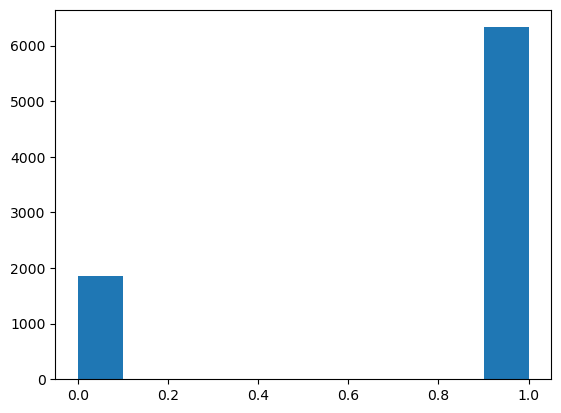

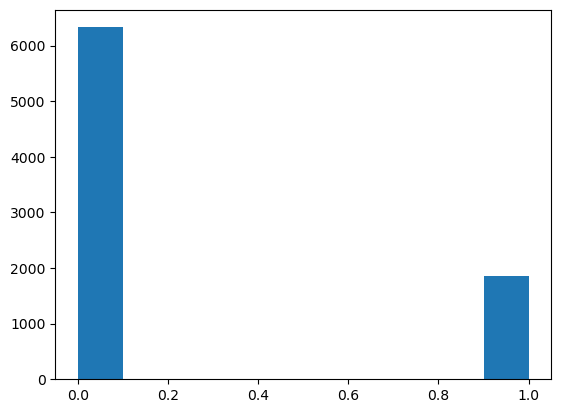

In [50]:
df['Viewed'] = df.action.apply(lambda x: 1 if x =='view' else 0)
df['Clicked'] = df.action.apply(lambda x: 1 if x == 'click' else 0)

plt.hist(df.Viewed)
plt.show()
plt.clf()

plt.hist(df.Clicked)
plt.show()

In [54]:
experiment = df[df.group == 'experiment']
experiment.Viewed.value_counts(normalize=True), experiment.Clicked.value_counts(normalize=True)

(1    0.763507
 0    0.236493
 Name: Viewed, dtype: float64,
 0    0.763507
 1    0.236493
 Name: Clicked, dtype: float64)

In [56]:
control = df[df.group == 'control']
control.Viewed.value_counts(normalize=True)

1    0.781426
0    0.218574
Name: Viewed, dtype: float64

In [57]:
eids = set(df[df.group=='experiment']['id'].unique())
cids = set(df[df.group=='control']['id'].unique())
print('Overlap of experiment and control groups: {}'.format(len(eids&cids)))

Overlap of experiment and control groups: 0


## Conduct a Statistical Test

Conduct a statistical test to determine whether the experimental homepage was more effective than that of the control group.

In [59]:
#Your code here
from scipy.stats import ttest_ind

ttest_ind(control.Clicked, experiment.Clicked, equal_var = False)



Ttest_indResult(statistic=-1.9312441445072492, pvalue=0.05348777384439879)

## Verifying Results

One sensible formulation of the data to answer the hypothesis test above would be to create a binary variable representing each individual in the experiment and control group. This binary variable would represent whether or not that individual clicked on the homepage; 1 for they did and 0 if they did not. 

The variance for the number of successes in a sample of a binomial variable with n observations is given by:

## $n\bullet p (1-p)$

Given this, perform 3 steps to verify the results of your statistical test:
1. Calculate the expected number of clicks for the experiment group, if it had the same click-through rate as that of the control group. 
2. Calculate the number of standard deviations that the actual number of clicks was from this estimate. 
3. Finally, calculate a p-value using the normal distribution based on this z-score.

### Step 1:
Calculate the expected number of clicks for the experiment group, if it had the same click-through rate as that of the control group. 

In [63]:
#Your code here
expected = control.Clicked.mean()* len(experiment)

### Step 2:
Calculate the number of standard deviations that the actual number of clicks was from this estimate.

In [62]:
#Your code here
n = len(experiment)
p = control.Clicked.mean()
var = n * p * (1-p)
std = np.sqrt(var)
print(std)

25.888551746650283


### Step 3: 
Finally, calculate a p-value using the normal distribution based on this z-score.

In [65]:
#Your code here
z = (experiment.Clicked.sum() - expected)/ std


stats.norm.sf(z)

0.003303067275926571

### Analysis:

Does this result roughly match that of the previous statistical test?

> Comment: **Your analysis here**

## Summary

In this lab, you continued to get more practice designing and conducting AB tests. This required additional work preprocessing and formulating the initial problem in a suitable manner. Additionally, you also saw how to verify results, strengthening your knowledge of binomial variables, and reviewing initial statistical concepts of the central limit theorem, standard deviation, z-scores, and their accompanying p-values.